## Task 5 Light-conduction in a non-perfect polarizer(sequence by)
![Pict for perfect polarizer](https://www4.uwsp.edu/physastr/kmenning/images/Walker5e_25_f_26.png 'Pict for perfect polarizer')


We have to research how light are tranported in system of N polarizers rotated on the angle $\theta$ each by last.
It is easy to demonctrate, that Magnitudeы of field are changed like
$$\mathbf{E}^{(i+1)}=\begin{pmatrix}
E^{(i+1)}_{\parallel}\\
E^{(i+1)}_{\bot}
\end{pmatrix} = \hat{S}\,\mathbf{E}^{(i)}, \text{where } \hat{S} = 
\begin{pmatrix}
    \alpha & 0 \\
         0 & \beta
\end{pmatrix}
\begin{pmatrix}
    \cos \theta & \sin \theta \\
    -\sin \theta & \cos \theta
\end{pmatrix}
$$

In [54]:
import numpy as np
import cmath as cm
def get_s(b=0, t=1, a=1):
    T = np.diagflat([a,b])
    c = np.cos(t)
    s = np.sin(t)
    U = np.matrix([[c, s],[-s, c]])
    return T@U

### It is supposed, that on first polarizer lays natural light.
Thus to find the intensity on output we can done independently two ortogonal conditions, count each intensity and after that just add
$$
I_{\sum}(N) = I_{\parallel}(N) + I_{\bot}(N) ,\; \text{where }I_{\xi} = \|\hat{S}^{N}\mathbf{E}_{\xi}^{(0)}\|^2 = 
{\langle}\mathbf{E}_{\xi}^{(0)}{\rvert} (\hat{S}^{\dagger})^N (\hat{S})^{N} {\lvert}\mathbf{E}_{\xi}^{(0)}{\rangle} = {\langle}\mathbf{E}_{\xi}^{(0)}{\rvert}\hat{\Omega}_N{\lvert}\mathbf{E}_{\xi}^{(0)}{\rangle}
$$
Also, $\hat{S}$ is not normal operator, and we can't replace $(\hat{S}^{\dagger})^N (\hat{S})^{N}$ on $(\hat{S}^{\dagger} \hat{S})^{N} $
$$\large
I_{\sum} = \mathrm{Tr}\, \hat{\Omega}_{N} , \text{where } \hat{\Omega}_{N}  = (\hat{S}^{\dagger})^N \hat{S}^{N}
$$


In [55]:
def next_w (w, s):
    return s.H @ w @ s

In [56]:
W0 = np.identity(2)

*Notice, that we can let $\alpha = 1$ and measure $\beta$ in that. After all activities we mast turn there back, by multiple on $\alpha^{2N}$ and exchange $\beta$ to $\beta/\alpha$*.

## Dependency on $\theta$

<IPython.core.display.Javascript object>


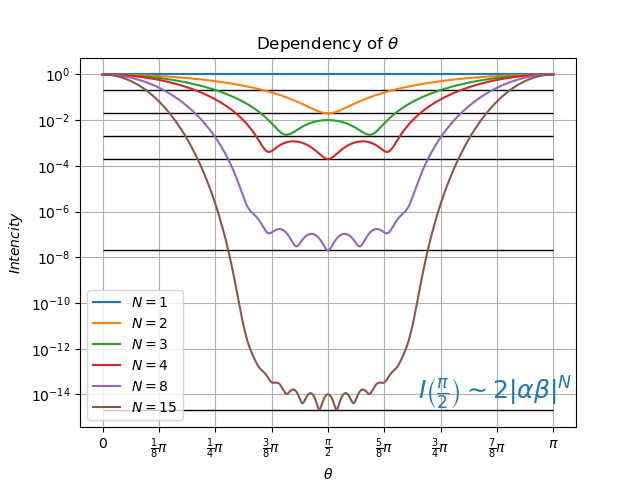

In [253]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numpy import *
%matplotlib notebook
bt = 0.1*np.exp(0.2j)
t = np.linspace(0, np.pi, 1000)

def get_i_by_t (N, t, b):
    i = []
    for tt in t:
        s = get_s(b, tt)
        w = W0
        for j in range(N):
            w = next_w(w, s)
        i.append(np.abs(np.trace(w)))
    return np.array(i)

plt.figure()

for N in [1, 2, 3, 4, 8, 15]:
    itn = get_i_by_t(N, t, bt)
    #int_without_b = get_i_by_t(N, t, 0)
    plt.plot(t, itn, '-', label = fr'$N = {N}$')
    #plt.plot(t, int_without_b, '-')
    plt.hlines(abs(bt)**(N)*2, 0, np.pi, lw=1)

plt.xticks(np.linspace(0,np.pi,9),
       ('0',r'$\frac{1}{8}\pi$',r'$\frac{1}{4}\pi$',
        r'$\frac{3}{8}\pi$',r'$\frac{\pi}{2}$',r'$\frac{5}{8}\pi$',
        r'$\frac{3}{4}\pi$',r'$\frac{7}{8}\pi$',r'$\pi$'))

plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          title_fontsize = '12'    #  размер шрифта заголовка
          )

plt.text(2.2, 8e-14, r'$I\left(\frac{\pi}{2}\right) \sim 2 |\alpha \beta|^{N}$',
        {'color': 'C0', 'fontsize': 18}, va="top")

plt.xlabel(r'$\theta$')
plt.ylabel(r'$Intencity$')
plt.title(r'Dependency of $\theta$')
plt.grid()
plt.yscale('log')

<IPython.core.display.Javascript object>


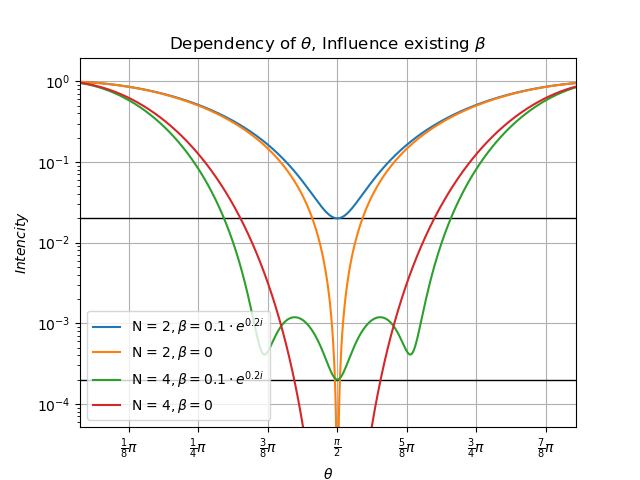

N = 2
N = 4


In [265]:
plt.figure()

for N in [2, 4]:
    itn = get_i_by_t(N, t, bt)
    int_without_b = get_i_by_t(N, t, 0)
    label = f'N = {N}' 
    print(label)
    plt.plot(t, itn, '-', label = label + r',$\,\beta = 0.1 \cdot e^{0.2i}$')
    
    label = f'N = {N}' 
    plt.plot(t, int_without_b, '-', label = label + r',$\,\beta = 0$')
    plt.hlines(abs(bt)**(N)*2, 0, np.pi, lw=1)

plt.xticks(np.linspace(0,np.pi,9),
       ('0',r'$\frac{1}{8}\pi$',r'$\frac{1}{4}\pi$',
        r'$\frac{3}{8}\pi$',r'$\frac{\pi}{2}$',r'$\frac{5}{8}\pi$',
        r'$\frac{3}{4}\pi$',r'$\frac{7}{8}\pi$',r'$\pi$'))

plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          title_fontsize = '12'    #  размер шрифта заголовка
          )

#plt.text(2.2, 8e-14, r'$I\left(\frac{\pi}{2}\right) \sim 2 |\alpha \beta|^{N}$',
#        {'color': 'C0', 'fontsize': 18}, va="top")

plt.xlabel(r'$\theta$')
plt.ylabel(r'$Intencity$')
plt.title(r'Dependency of $\theta$, Influence existing $\beta$')
plt.grid()
plt.yscale('log')

## Dependency of $\beta$

In [277]:
init = np.linspace(-0.2, 0.2, 300)
real, imag = np.meshgrid(init,init)
b = real + 1j*imag
b = np.asarray(b, dtype=np.complex192)

def get_i_b(b, N=3, t=1):
    s = get_s(b, t)
    w = W0
    for _ in range(N):
        w = next_w(w, s)
    return np.abs(np.trace(w))
gb = vectorize(get_i_b)

[1.         1.00003164 1.00050625 1.00256289 1.0081    ]


<IPython.core.display.Javascript object>


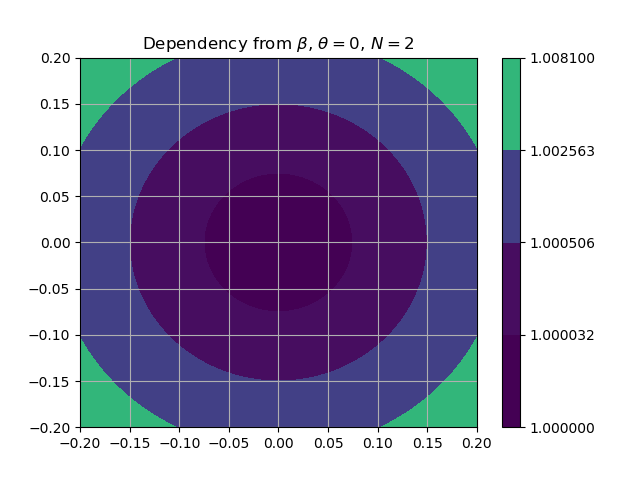

In [284]:
t = 0
n = 2
res_ = gb(b, n, t)
b_levels = np.linspace(0, 0.3, 5)

b_levels = np.asarray(b_levels, dtype=np.float96)
res_levels = gb(b_levels, n, t)
print(res_levels)
curves=plt.contourf(real, imag, res_, levels=res_levels)
#plt.clabel(curves, colors = 'k', fmt = '%2.1f', fontsize=12)

#plt.clabel(curves)
plt.colorbar(curves)
plt.title(fr'Dependency from $\beta$, $\theta = {t} ,\, N = {n}$')
plt.grid()

[3.74939946e-33 1.12500000e-02 4.50000000e-02 1.01250000e-01
 1.80000000e-01]


<IPython.core.display.Javascript object>


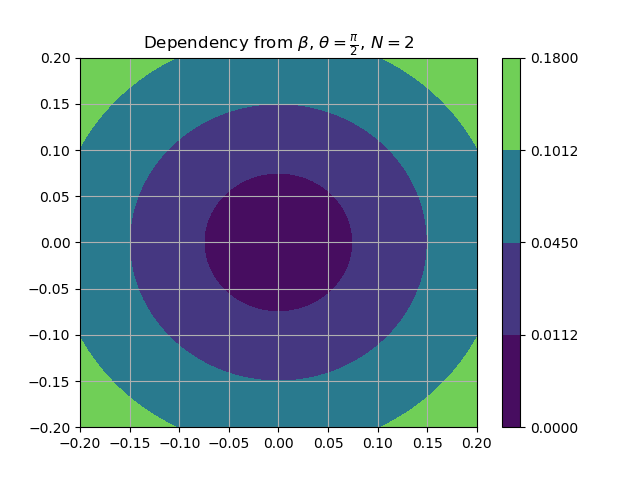

In [251]:
t = np.pi/2
n = 2
res_ = gb(b, n, t)
b_levels = np.linspace(0, 0.3, 5)
b_levels = np.asarray(b_levels, dtype=np.float96)
res_levels = gb(b_levels, n, t)


#x = np.linspace(0, 0.3, 400)
#r = res_levels.copy()
#
#circ = np.sqrt()

print(res_levels)
curves=plt.contourf(real, imag, res_, levels=res_levels)
#plt.clabel(curves, colors = 'k', fmt = '%2.1f', fontsize=12)

#plt.clabel(curves)
plt.colorbar(curves)
plt.title(r'Dependency from $\beta$, $\theta =\frac{\pi}{2},\, N = 2 $' )
plt.grid()

In [285]:
init = np.linspace(-0.6, 0.6, 400)
real, imag = np.meshgrid(init,init)
b = real + 1j*imag
b = np.asarray(b, dtype=np.complex192)

t=np.pi/4
n=3

res = gb(b, n, t)

<IPython.core.display.Javascript object>


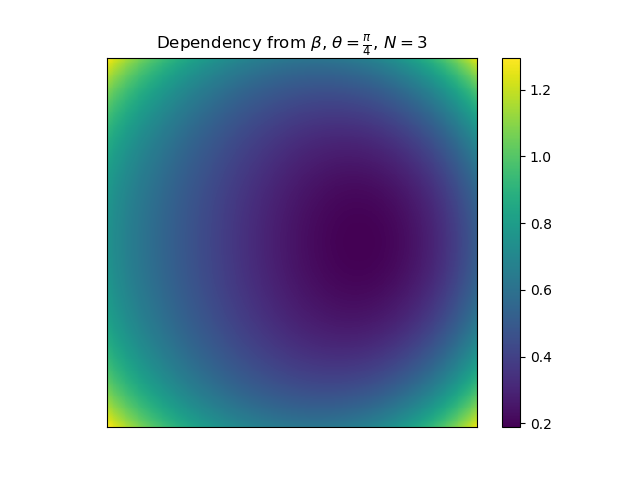

In [335]:
plt.xticks([])
plt.yticks([])


plt.imshow(res)
plt.colorbar()
plt.title(r'Dependency from $\beta$, $\theta =\frac{\pi}{4},\, N = 3 $' )
plt.grid()

[0.18916196 0.20267182 0.22397401 0.25       0.32352257 0.505984  ]


<IPython.core.display.Javascript object>


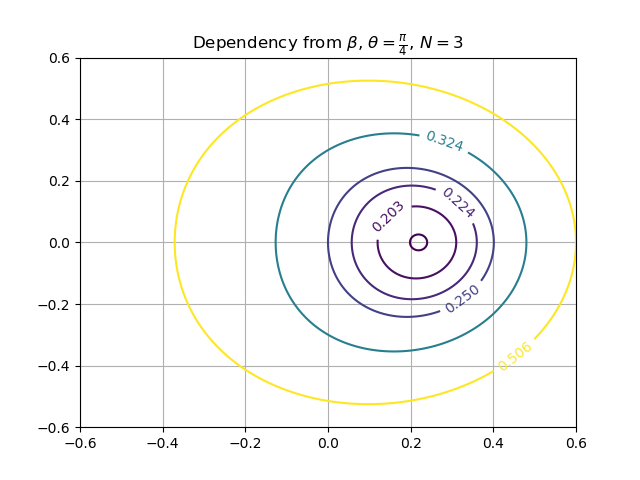

In [334]:
n = 3
b_levels = np.linspace(0, 0.6, 6)
b_levels = np.asarray(b_levels, dtype=np.float96)
res_levels = gb(b_levels, n, t)
res_levels.sort()
print(res_levels)

#r = b_levels[1]
#x = np.linspace(-r, r, 500)
#y = np.sqrt(r*r - x*x)
#plt.plot(x, y,'r--', x,-y,'r--')

curves=plt.contour(real, imag, res, levels=res_levels)
plt.clabel(curves)
plt.title(r'Dependency from $\beta$, $\theta =\frac{\pi}{4},\, N = 3 $' )
plt.grid()

<IPython.core.display.Javascript object>


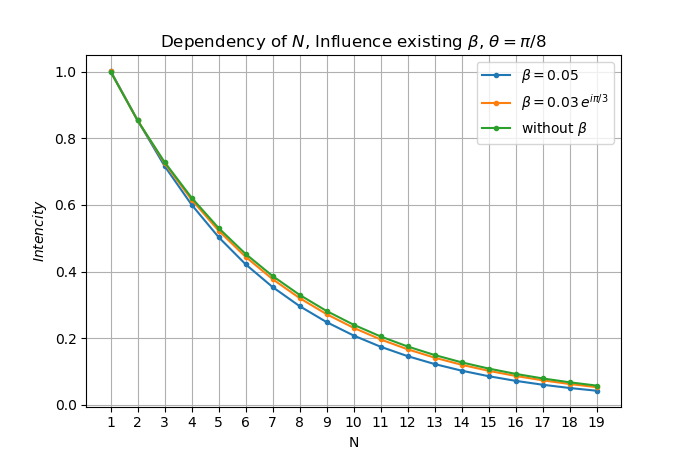

In [387]:
plt.figure()

t = np.pi/8
b = 0.05
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 20)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))
plt.plot(n, res,'.-',label=r'$\beta=0.05$')

t = np.pi/8
b = 0.03*np.exp(np.pi/3*1j)
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 20)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))
plt.plot(n, res,'.-',label=r'$\beta=0.03\,e^{i\pi/3}$')

res = np.array(res)
n = np.array(n)
plt.plot(n,np.cos(t)**(2*n-2),'.-',label=r'without $\beta$')
#plt.plot([1],gb(0, 1, t),'.-',label=r'without $\beta$')
plt.xticks(n)
           
plt.legend()
plt.xlabel(r'N')
plt.ylabel(r'$Intencity$')
plt.title(r'Dependency of $N$, Influence existing $\beta$, $\theta = \pi/8$')
plt.grid()
#plt.yscale('log')

### Point
Now look below, to see how $\beta$ influences on intencity when N grows.
We know, that withou $\beta$:
$$\large
I(N,\theta,\beta=0) \sim \cos(\theta)^{2(N-1)}
$$
And we are ploting supplement:
$$\large
\Delta = \frac{I(N,\theta,\beta) - I(N,\theta,\beta=0)}{I(N,\theta,\beta=0)}
$$

<IPython.core.display.Javascript object>


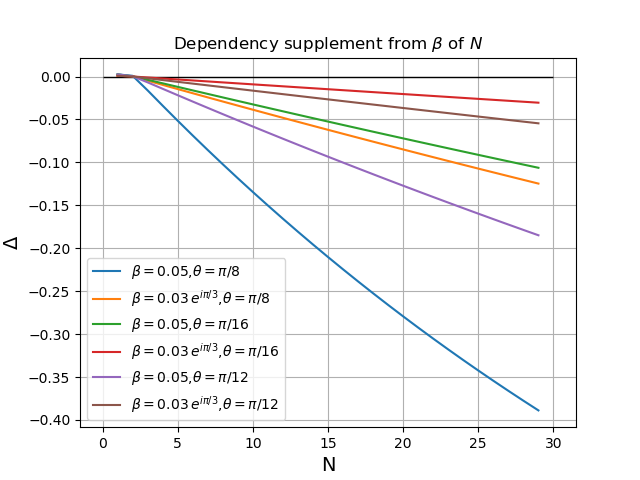

In [390]:
plt.figure()

t = np.pi/8
b = 0.05
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 30)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))

res = np.array(res)
n = np.array(n)

plt.plot(n, (res-np.cos(t)**(2*n-2))/np.cos(t)**(2*n-2),'-',label=r'$\beta=0.05$,$\theta = \pi/8$')

t = np.pi/8
b = 0.03*np.exp(np.pi/3*1j)
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 30)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))

res = np.array(res)
n = np.array(n)

plt.plot(n, (res-np.cos(t)**(2*n-2))/np.cos(t)**(2*n-2),'-',label=r'$\beta=0.03\,e^{i\pi/3}$,$\theta = \pi/8$')


#plt.plot(n,np.cos(t)**(2*n),'.-',label=r'without $\beta$')
#####################################################################################################
t = np.pi/16
b = 0.05
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 30)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))

res = np.array(res)
n = np.array(n)

plt.plot(n, (res-np.cos(t)**(2*n-2))/np.cos(t)**(2*n-2),'-',label=r'$\beta=0.05$,$\theta = \pi/16$')

t = np.pi/16
b = 0.03*np.exp(np.pi/3*1j)
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 30)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))

res = np.array(res)
n = np.array(n)

plt.plot(n, (res-np.cos(t)**(2*n-2))/np.cos(t)**(2*n-2),'-',label=r'$\beta=0.03\,e^{i\pi/3}$,$\theta = \pi/16$')


##########################################################################################

t = np.pi/12
b = 0.05
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 30)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))

res = np.array(res)
n = np.array(n)

plt.plot(n, (res-np.cos(t)**(2*n-2))/np.cos(t)**(2*n-2),'-',label=r'$\beta=0.05$,$\theta = \pi/12$')

t = np.pi/12
b = 0.03*np.exp(np.pi/3*1j)
s = get_s(b=b, t=t)
res= []

w = W0
n = range(1, 30)
for _ in n:
    w = next_w(w,s)
    res.append(np.abs(np.trace(w)))

res = np.array(res)
n = np.array(n)

plt.plot(n, (res-np.cos(t)**(2*n-2))/np.cos(t)**(2*n-2),'-',label=r'$\beta=0.03\,e^{i\pi/3}$,$\theta = \pi/12$')
###############################################################################################

#plt.xticks(n)
plt.hlines(0,0,30,lw=1)   
plt.legend()
plt.xlabel(r'N',size=14)
plt.ylabel(r'$\Delta$',size=14)
plt.title(r'Dependency supplement from $\beta$ of $N$')
plt.grid()
#plt.yscale('log')

## Task 10. Circuit wave

Here i have been looking at transfer and reflection circular light from vacuum to enviroment. How exchange polarization?
![pic](https://studref.com/htm/img/15/7895/46.png "")

It is easy to see, that dergeed of ellipticity both wave is:
$$\large
\alpha_r = \left| \frac{r_{\parallel}}{r_{\bot}}\right| = \left| \frac{\cos(\varphi_1 + \varphi_2)}{\cos(\varphi_1 - \varphi_2)}\right|
$$

$$\large
\alpha_t = \left| \frac{t_{\parallel}}{t_{\bot}}\right| = \left| \frac{\cos \varphi_1 + n \cos \varphi_2}{n \cos \varphi_1 +  \cos \varphi_2}\right|
$$
Where $\fbox{$n \sin \varphi_2= \sin \varphi_1$}$ from the Snellius law.

In [145]:
def get_phi_2_(phi_1, n):
    return np.arcsin(np.sin(phi_1) / n)
get_phi_2 = vectorize(get_phi_2_)

In [164]:
phi_1 = np.linspace(0, np.pi/2, 1000)
n = 1.5
phi_2 = get_phi_2(phi_1, n)
a_r = - np.cos(phi_1 + phi_2) / np.cos(phi_1 - phi_2) # minus due to reflection (change direction wave)
a_t = (np.cos(phi_1) + n * np.cos(phi_2)) / (n * np.cos(phi_1) + np.cos(phi_2))

<IPython.core.display.Javascript object>


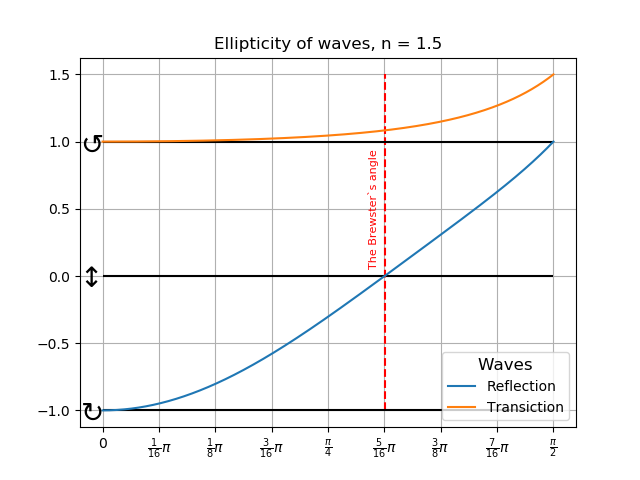

In [194]:
phi_br = np.arctan(n)
plt.figure()
plt.plot(phi_1, a_r, label='Reflection')
plt.plot(phi_1, a_t, label='Transiction')
plt.title(fr'Ellipticity of waves, n = {n}')
plt.xticks(np.linspace(0,np.pi/2,9),
       ('0',r'$\frac{1}{16}\pi$',r'$\frac{1}{8}\pi$',
        r'$\frac{3}{16}\pi$',r'$\frac{\pi}{4}$',r'$\frac{5}{16}\pi$',
        r'$\frac{3}{8}\pi$',r'$\frac{7}{16}\pi$',r'$\frac{\pi}{2}$'))
plt.grid()
plt.legend(loc=4
           , fontsize = 10,
          ncol = 1,    #  количество столбцов
          title_fontsize = '12',    #  размер шрифта заголовка
            title = 'Waves'
          )
plt.hlines(0, phi_1[0], phi_1[-1])

#trans_angle = plt.gca().transData.transform_angles(np.array((45,)),
                                                  # l2.reshape((1, 2)))[0]
plt.text(np.pi/3.4, 0.05, 'The Brewster`s angle',
        {'color': 'red', 'fontsize': 8}, va="top", rotation=90, rotation_mode='anchor')
plt.vlines(phi_br, -1, 1.5, colors='r', linestyles='--')

plt.text(-0.1, -0.08, r'$\updownarrow$',fontsize=20, color='black')
plt.text(-0.08, -0.08+1, r'$\circlearrowleft$',fontsize=20, color='black')
plt.text(-0.08, -0.08-1, r'$\circlearrowright$',fontsize=20, color='black')


plt.hlines(1, phi_1[0], phi_1[-1])
plt.hlines(-1, phi_1[0], phi_1[-1])

